In [17]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
#
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pickle
import seaborn as sns


In [18]:
df = pd.read_csv('Spam Email Classifier.csv')
df.head(5)

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [19]:
df.groupby('label').describe()

text                                                               
       count unique                                                top freq
label                                                                      
0      39538  39538  subscribe change profile contact us long term ...    1
1      43910  43910  get the most out of life ! viagra has helped m...    1

In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [21]:
df.describe()


,label
count,83448.000000
mean,0.526196
std,0.499316
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [22]:
#Start Data Preprocessing

In [23]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [24]:
spam_values_2500_3000 = df.loc[2500:3000, 'label'].tolist()
spam_values_45000_45500 = df.loc[45000:45500, 'label'].tolist()

In [25]:
text_values_6500_7000 = df.loc[6500:7000, 'text'].tolist()
text_values_35000_36000 = df.loc[35000:36000, 'text'].tolist()

In [26]:
# استبدال القيم الأصلية بـ NULL (np.nan)
df.loc[2500:3000, 'label'] = np.nan
df.loc[45000:45500, 'label'] = np.nan
df.loc[6500:7000, 'text'] = np.nan
df.loc[35000:36000, 'text'] = np.nan

In [30]:
df.isnull().sum()

label    1002
text     1502
dtype: int64

In [35]:
df.loc[2490:2550]

,label,text
2490,0.0,still a work in progress . . .\n- - - - - orig...
2491,0.0,"please disregard the previous allocations , be..."
2492,0.0,"louise ,\nenron property has asked me to valid..."
2493,0.0,alert name bush president reflects on soldiers...
2494,0.0,hi if you don't use rand you will allways get ...
...,...,...
2546,NaN,"from : tukur mana ,\nfederal secretariat compl..."
2547,NaN,"trade counts , by 4 pm , since october 1 :\ntr..."
2548,NaN,re * mov * e me\napprove cabinetrycamden flaw ...
2549,NaN,dear customer do you shop for medications on t...


In [36]:
print("Dataset after replacing values with null:")
df

Dataset after replacing values with null:


,label,text
0,1.0,ounce feather bowl hummingbird opec moment ala...
1,1.0,wulvob get your medircations online qnb ikud v...
2,0.0,computer connection from cnn com wednesday es...
3,1.0,university degree obtain a prosperous future m...
4,0.0,thanks for all your answers guys i know i shou...
...,...,...
83443,0.0,hi given a date how do i get the last date of ...
83444,1.0,now you can order software on cd or download i...
83445,1.0,dear valued member canadianpharmacy provides a...
83446,0.0,subscribe change profile contact us long term ...


In [40]:
# إعادة القيم إلى أماكنها الأصلية
# إعادة القيم في العمود "label"
df.loc[2500:3000, 'label'] = spam_values_2500_3000
df.loc[45000:45500, 'label'] = spam_values_45000_45500

In [41]:
df.isnull().sum()

label       0
text     1502
dtype: int64

In [42]:
df.loc[6500:7000, 'text'] = text_values_6500_7000
df.loc[35000:36000, 'text'] = text_values_35000_36000

In [43]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [44]:
df.loc[2490:2550]

,label,text
2490,0.0,still a work in progress . . .\n- - - - - orig...
2491,0.0,"please disregard the previous allocations , be..."
2492,0.0,"louise ,\nenron property has asked me to valid..."
2493,0.0,alert name bush president reflects on soldiers...
2494,0.0,hi if you don't use rand you will allways get ...
...,...,...
2546,1.0,"from : tukur mana ,\nfederal secretariat compl..."
2547,0.0,"trade counts , by 4 pm , since october 1 :\ntr..."
2548,1.0,re * mov * e me\napprove cabinetrycamden flaw ...
2549,1.0,dear customer do you shop for medications on t...


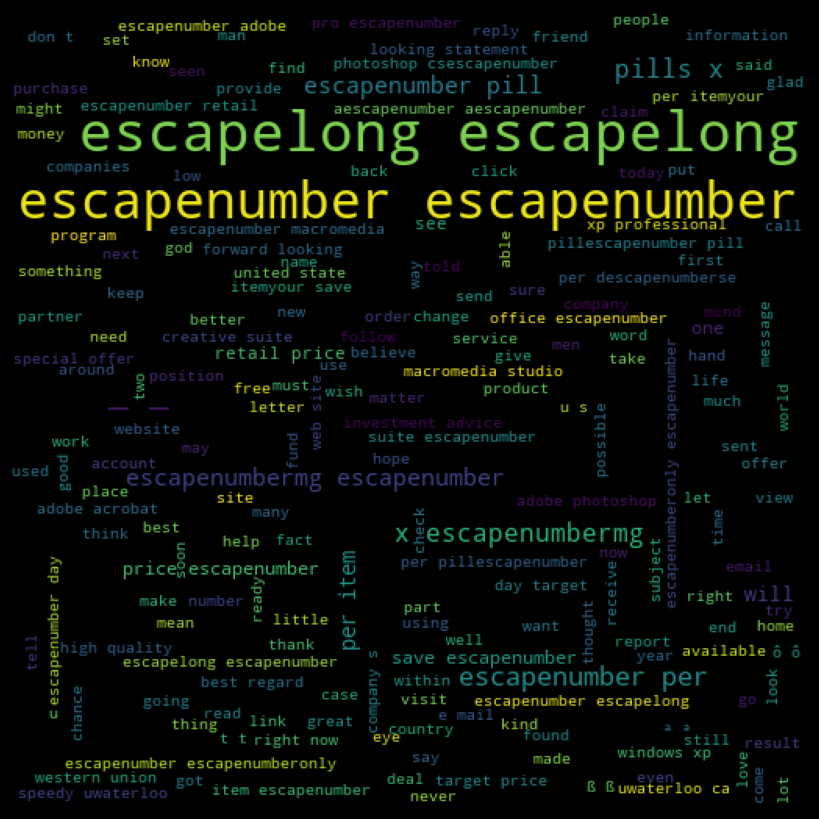

In [6]:
#WordCloud to see the frequently used words
spam_words = ' '.join(list(df[df['label'] == 1]['text']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

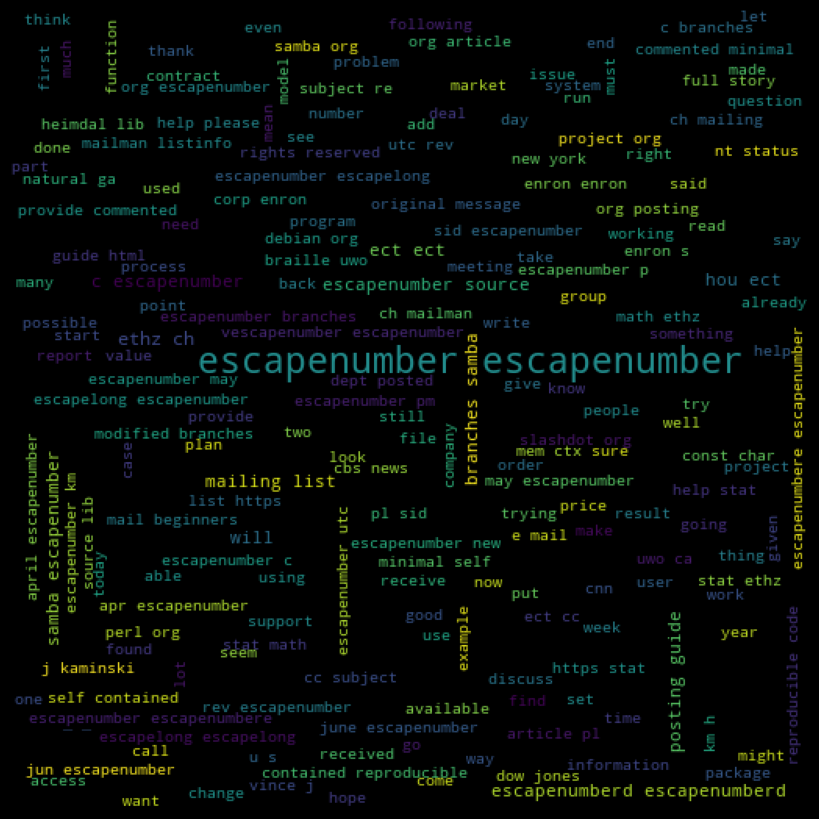

In [7]:
#WordCloud to see the frequently used words
spam_words = ' '.join(list(df[df['label'] == 0]['text']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [8]:
spam=df[df['label']==1]


In [9]:
ham=df[df['label']==0]


In [10]:
spam


,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
3,1,university degree obtain a prosperous future m...
8,1,works gateway world art explore tattooing full...
9,1,upon this account he is not only very cautious...
...,...,...
83439,1,http printlost hk viagra escapenumber pills x ...
83441,1,lowest prices hbie qsxh gycj swlw swsszguohc z...
83444,1,now you can order software on cd or download i...
83445,1,dear valued member canadianpharmacy provides a...


In [11]:
ham

,label,text
2,0,computer connection from cnn com wednesday es...
4,0,thanks for all your answers guys i know i shou...
5,0,larry king live at escapenumber escapenumber p...
6,0,michael pobega wrote i'm not sure if it's the ...
7,0,hi i have this error tr sample escapenumber es...
...,...,...
83436,0,hi list please see the following simple exampl...
83440,0,howstuffworks r lifestyle april escapenumber e...
83442,0,tewk wrote patch was to large to attach so htt...
83443,0,hi given a date how do i get the last date of ...


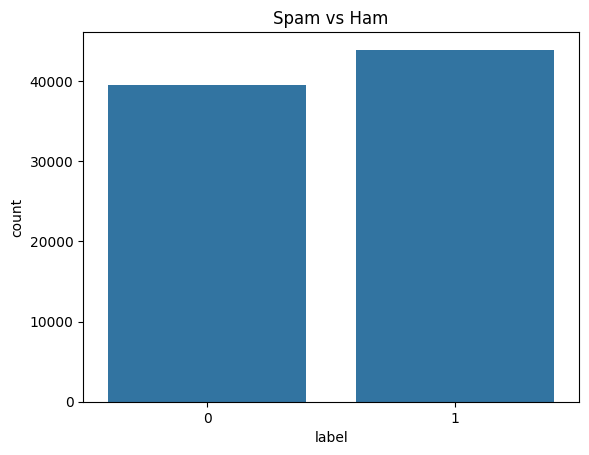

In [12]:
sns.countplot(x='label', data=df)
plt.title('Spam vs Ham')  # إضافة عنوان للرسم البياني
plt.show()

In [13]:
#To test our model we have to split our data into train and test dataset.
#We will use 75% for training and remaining 25% for testing
X_train, X_test, y_train, y_test = train_test_split(df.text,df.label, test_size=0.25)

In [14]:
corpus = [
     'This is the first document.', #1
     'This document is the second document.', #2
     'And this is the third one.', #3
     'Is this the first document?', #4
]


vectorizer = CountVectorizer()

# تحويل النصوص إلى مصفوفة أرقام
X = vectorizer.fit_transform(corpus)

# طباعة الكلمات الفريدة (السمات) المستخدمة كأعمدة
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [15]:
#Build a matrix with each of the word. This represents words as count. 
# We can use these individual features 
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [16]:
#Count Vectorizer to convert words into a matrix of features.
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
#X_train_count.toarray()[:2]

In [17]:
print(v.get_feature_names_out())
#الكلمات الموجود في العواميد الي بجيب تكرارها

['00' '000' '0000' ... '小楊' '拒信pt' '李俊杰']


In [18]:
#We are using Multinomial Naive Bayes model to classify text. For this example we have count of each word to predict
# the label ham or spam.
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [19]:
emails = [
    
   'Get free coupons now!',
    'Meeting scheduled at 10 AM tomorrow',
    'Congratulations, you have won a prize!'

]
emails_count = v.transform(emails)
test = model.predict(emails_count)
for i in test:
    if i == 0:
        print("not spam")
    elif i == 1:
        print("spam")

spam
not spam
spam


In [20]:
#Get the model accurancy score
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.9746428913814591

In [21]:
#save the count vector file
pickle.dump(v, open('count_vect', 'wb'))

In [22]:
# Saving the model
pickle.dump(model, open('email_class.pkl', 'wb'))

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Transform the test data


# Make predictions
y_pred = model.predict(X_test_count)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='binary')  
recall = recall_score(y_test, y_pred, average='binary')        
f1 = f1_score(y_test, y_pred, average='binary')                
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])  # TN / (TN + FP)

# Display metrics
print(f"Accuracy: {accuracy}")
print(f"Error Rate: {error_rate}")
print(f"Precision: {precision}")
print(f"Recall (Sensitivity): {recall}")
print(f"Specificity: {specificity}")
print(f"F1 Score: {f1}")

# Classification Report (provides a breakdown of metrics for each class)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 9752   151]
 [  378 10581]]
Accuracy: 0.9746428913814591
Error Rate: 0.025357108618540902
Precision: 0.9859299291837496
Recall (Sensitivity): 0.9655078018067342
Specificity: 0.9847520953246491
F1 Score: 0.9756120049790236

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9903
           1       0.99      0.97      0.98     10959

    accuracy                           0.97     20862
   macro avg       0.97      0.98      0.97     20862
weighted avg       0.97      0.97      0.97     20862

